Spotify Recommender Build Notebook: Version 1

PLAN
1. Build poetry file and install relevant packages
2. Ingest data into notebook
3. Exploratory data analysis
    3.1. How to add track information into dataframe? e.g. genre, bpm, etc.
4. Research different types of recommender algorithms
5. Build models
6. Test etc...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [2]:
import sys
sys.path.append("../source")
import data_ingest
import data_preprocessing
import eda
import api_access
import recommending
import params

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
og_spotify_df = data_ingest.og_data_ingest()
og_spotify_df

,endTime,artistName,trackName,msPlayed
0,2022-06-16 08:09,Mura Masa,blessing me (with Pa Salieu & Skillibeng),4608
1,2022-06-16 08:09,Foals,2 Trees,5141
2,2022-06-16 08:09,Everything Everything,Bad Friday,57990
3,2022-06-16 08:14,Foals,2 Trees,311185
4,2022-06-16 08:15,Wolf Alice,Bobby - Live,22496
...,...,...,...,...
51831,2023-06-15 18:58,Pangaea,Installation,223500
51832,2023-06-15 19:00,Billy Bragg,California Stars,78318
51833,2023-06-15 20:08,Pangaea,Still Flowing Water,2484
51834,2023-06-15 20:08,Love Spirals Downwards,Nova,2252


In [5]:
ext_spotify_df = data_ingest.ext_data_ingest()
ext_spotify_df

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2022-01-27T16:31:21Z,1114737822,"iOS 15.1 (iPhone11,8)",4270,GB,213.205.192.181,unknown,Overgrown,James Blake,Overgrown,spotify:track:7rHIRFNCDu6o9LWtGMevK1,None,None,None,fwdbtn,fwdbtn,True,None,False,1643301076298,False
1,2022-01-27T16:31:26Z,1114737822,"iOS 15.1 (iPhone11,8)",5630,GB,213.205.192.181,unknown,Like Swimming,Foals,Antidotes,spotify:track:5NIIk7DasEKlMfvUOHHKJH,None,None,None,fwdbtn,fwdbtn,True,None,False,1643301080572,False
2,2022-01-27T16:31:28Z,1114737822,"iOS 15.1 (iPhone11,8)",1470,GB,213.205.192.181,unknown,Never Let Me Go,Florence + The Machine,Ceremonials,spotify:track:3HNTLCpAGnizbyJmk7466r,None,None,None,fwdbtn,fwdbtn,True,None,False,1643301086212,False
3,2022-01-27T16:31:30Z,1114737822,"iOS 15.1 (iPhone11,8)",2400,GB,213.205.192.181,unknown,JU$T (feat. Pharrell Williams & Zack de la Rocha),Run The Jewels,RTJ4,spotify:track:10vS4ZLi4XWlIsNXSQXgqh,None,None,None,fwdbtn,fwdbtn,True,None,False,1643301087695,False
4,2022-01-27T16:33:49Z,1114737822,"iOS 15.1 (iPhone11,8)",138800,GB,213.205.192.181,unknown,Tiny Cities,Flume,Skin,spotify:track:4I1mVXkJiE8F4M5jWgGK7E,None,None,None,fwdbtn,endplay,True,None,False,1643301090102,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76309,2023-06-26T19:24:58Z,1114737822,osx,268893,GB,143.58.226.182,unknown,DHL,Frank Ocean,DHL,spotify:track:2INhKpUdzh7v0j041gZNsz,None,None,None,trackdone,trackdone,True,False,False,1687807229,False
76310,2023-06-26T19:27:54Z,1114737822,osx,183861,GB,143.58.226.182,unknown,So Hot You're Hurting My Feelings,Caroline Polachek,Pang,spotify:track:5B6Kjha6RRIMWGN7zGsAaT,None,None,None,trackdone,trackdone,True,False,False,1687807491,False
76311,2023-06-26T19:31:25Z,1114737822,osx,219106,GB,143.58.226.182,unknown,This World Couldn’t See Us,Nabihah Iqbal,This World Couldn’t See Us,spotify:track:13cQU9GKHqSDInv3s7h9fm,None,None,None,trackdone,trackdone,True,False,False,1687807667,False
76312,2023-06-26T19:33:18Z,1114737822,osx,120396,GB,143.58.226.182,unknown,damn right,Little Simz,Drop 6,spotify:track:3Q1HNg15qwjOlDy5ia1NJc,None,None,None,trackdone,trackdone,True,False,False,1687807878,False


In [6]:
ext_spotify_df = data_preprocessing.pre_processing(ext_spotify_df)

# What EDA questions do I want to answer? 
What are my top 10 most listened to artists / albums?
What are my top 50 most listened to songs? 
How do these change across months? 
What are my most skipped songs? 

In [7]:
artists = eda.top_artists(ext_spotify_df)
albums = eda.top_albums(ext_spotify_df)
top_tracks = eda.top_tracks(ext_spotify_df)
skipped_tracks = eda.most_skipped(ext_spotify_df)

for val in [artists, albums, top_tracks, skipped_tracks]:
    print(val)

                                  count
master_metadata_album_album_name       
Mr. Morale & The Big Steppers      1044
Skinty Fia                          667
NO THANK YOU                        626
Punisher                            584
SOS                                 542
the record                          528
Sometimes I Might Be Introvert      466
hugo                                444
PAINLESS                            426
Universal Credit                    378
                                   count
master_metadata_album_artist_name       
Kendrick Lamar                      2197
Little Simz                         1562
Phoebe Bridgers                     1277
Fontaines D.C.                      1256
Bonobo                               947
Foals                                878
Overmono                             826
Wolf Alice                           793
Mura Masa                            786
Four Tet                             778
                            

# Accessing the spotify API


In [8]:
# sp = api_access.connect_to_spotipy()
# # test to print all of Radiohead's albums
# api_access.albums_test(sp)

# Adding API information to my listening history

In [9]:
# track_info_df = api_access.get_track_info(ext_spotify_df['spotify_track_uri'].head(5000))
# track_info_df.to_csv('track_info.csv')

In [10]:
track_info_df = pd.read_csv('../analysis/track_info.csv')

# join track info to existing df
ext_spotify_df_5k = data_preprocessing.track_info_process(ext_spotify_df.head(5000), track_info_df)

No missing values in the DataFrame.


# EDA on track features

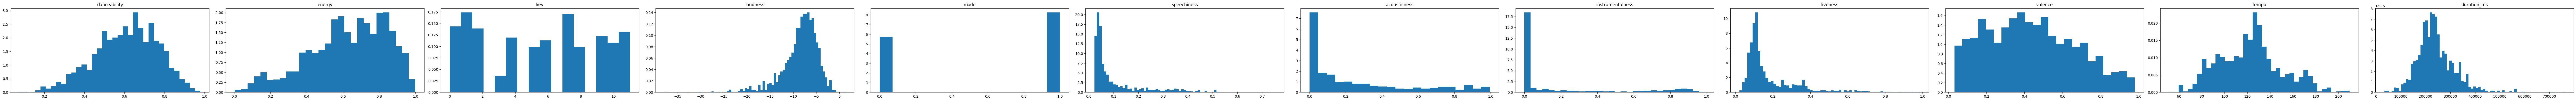

<Figure size 640x480 with 0 Axes>

In [11]:
eda.col_distributions(ext_spotify_df_5k[params.ALL_TRACK_FEATURES])

## Workshopping a content based recommendation system

In [12]:
features = data_preprocessing.features_to_arrays(ext_spotify_df_5k[params.MUSICAL_FEATURES])

In [17]:
components = recommending.principal_components_analysis(features)
recommending.cosine_similarity(components['PC1'], components['PC2'])

Cosine Similarity: 3.1404062610141046e-16


3.1404062610141046e-16

In [18]:
recommending.train_k_means(components, k=5)
components

/Users/kellyr13/Documents/spotify_data/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


NameError: name 'X' is not defined